In [111]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter


# Task 1 - Data exploration and preparation

## 1.1 Exploration 

Write code that does the following tasks:

**Assign the list of available classes to a variable with name CLASS_NAMES. For each class name, display one image and print the dimensions of the corresponding numpy array.**

In [112]:
#Defining class names to a list variable CLASS_NAMES
CLASS_NAMES = ["street","sea", "mountain", "glacier", "forest", "buildings"]

In [113]:
# Defining the base directory
base_dir = 'Intel_Image_dataset'

# Defining the subdirectories
sub_dirs = ['seg_train', 'seg_test']

In [114]:
# Collect one image path for each class
image_paths = []

for sub_dir in sub_dirs:
    for class_name in CLASS_NAMES:
        class_dir = os.path.join(base_dir, sub_dir, class_name)
        if os.path.isdir(class_dir):
            # Get the first image file in the class directory
            for file_name in os.listdir(class_dir):
                if file_name.lower().endswith(('.jpg')):
                    image_paths.append(os.path.join(class_dir, file_name))
                    break

In [115]:
# Function to display images
def display_images(image_paths, class_names):
    fig, axes = plt.subplots(1, len(CLASS_NAMES), figsize=(20, 5))
    for ax, img_path, class_name in zip(axes, image_paths, class_names):
        img = Image.open(img_path)
        ax.imshow(img)
        width, height = img.size
        ax.set_title(class_name)
        ax.axis('off')
        # Add image dimensions at the bottom
        ax.annotate(f"{width}x{height}", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', va='center', fontsize=12)
    plt.subplots_adjust(wspace=0.5, bottom=0.2)  # Adjust the width space and bottom margin
    plt.show()

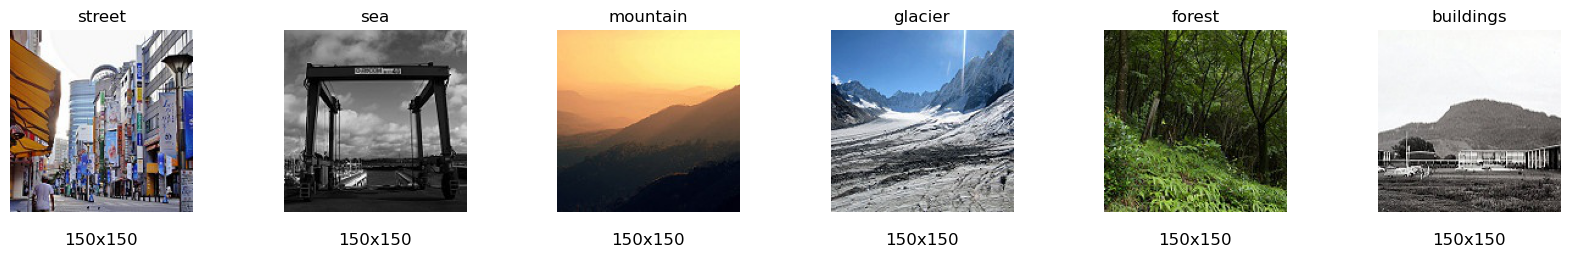

In [116]:
# Displaying the images for each class_names
display_images(image_paths, CLASS_NAMES)


**Determine the number of images in the training and test sets for each class name.**

In [117]:
# Count_images function to count images in each class folder
def count_images(base_dir, sub_dirs, class_names):
    counts = {sub_dir: {class_name: 0 for class_name in class_names} for sub_dir in sub_dirs}
    
    for sub_dir in sub_dirs:
        for class_name in class_names:
            class_dir = os.path.join(base_dir, sub_dir, class_name)
            if os.path.isdir(class_dir):
                counts[sub_dir][class_name] = len([file for file in os.listdir(class_dir) if file.lower().endswith(('.jpg'))])
    
    return counts

In [118]:
# Getting the counts using count_images function
image_counts = count_images(base_dir, sub_dirs, CLASS_NAMES)

In [119]:
# Displaying the counts
for sub_dir, class_counts in image_counts.items():
    print(f"\n{sub_dir}:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count}")


seg_train:
  street: 2382
  sea: 2274
  mountain: 2512
  glacier: 2404
  forest: 2271
  buildings: 2191

seg_test:
  street: 501
  sea: 510
  mountain: 525
  glacier: 553
  forest: 474
  buildings: 437


**Are there any significant differences between the proportions of images in the training and test sets?**

In [120]:
# Number of images in each class for seg_train
seg_train_counts = {
    "street": 2382,
    "sea": 2274,
    "mountain": 2512,
    "glacier": 2404,
    "forest": 2271,
    "buildings": 2191
}

# Number of images in each class for seg_test
seg_test_counts = {
    "street": 501,
    "sea": 510,
    "mountain": 525,
    "glacier": 553,
    "forest": 474,
    "buildings": 437
}

In [121]:
# Total number of images in seg_train and seg_test
total_train = sum(seg_train_counts.values())
total_test = sum(seg_test_counts.values())

# Calculate proportions
train_proportions = {k: v / total_train for k, v in seg_train_counts.items()}
test_proportions = {k: v / total_test for k, v in seg_test_counts.items()}

In [122]:
# Print proportions
print("Training Set Proportions:")
for k, v in train_proportions.items():
    print(f"{k}: {v:.4f}")

print("\nTest Set Proportions:")
for k, v in test_proportions.items():
    print(f"{k}: {v:.4f}")

Training Set Proportions:
street: 0.1697
sea: 0.1620
mountain: 0.1790
glacier: 0.1713
forest: 0.1618
buildings: 0.1561

Test Set Proportions:
street: 0.1670
sea: 0.1700
mountain: 0.1750
glacier: 0.1843
forest: 0.1580
buildings: 0.1457


**There are minor differences in the image proportions between the training and test sets for each class, but overall they are quite similar.For example:**

* Street: 16.76% in training vs. 16.27% in test
* Sea: 15.99% in training vs. 16.57% in test
* Mountain: 17.66% in training vs. 17.06% in test
* Glacier: 16.90% in training vs. 17.96% in test
* Forest: 15.98% in training vs. 15.39% in test
* Buildings: 15.41% in training vs. 14.14% in test

**Considering how minor the variations are, it appears that the picture proportions in the training and test sets are similar. For ensuring that the model learned on the training set will transfer well to the test set, this consistency is crucial.**

## 1.2 Data Preparation using TesnsorFlow's image_dataset_from_directory

In [123]:
#importing libraries
import tensorflow as tf

# Defining constants accroding to question requirements
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
SEED = 1234
CLASS_NAMES = ["street", "sea", "mountain", "glacier", "forest", "buildings"]
TRAIN_DIR = "./Intel_Image_dataset/seg_train"  # Path to train_seg directory
TEST_DIR = "./Intel_Image_dataset/seg_test"    # Path to test_seg directory

# Load training and validation datasets with a validation split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    label_mode='int',  # Can be changed to 'categorical' if needed
    class_names=CLASS_NAMES,
    color_mode='rgb'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    label_mode='int',  # Can be changed to 'categorical' if needed
    class_names=CLASS_NAMES,
    color_mode='rgb'
)

# Load test dataset (no validation split here)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    label_mode='int',  # Can be changed to 'categorical' if needed
    class_names=CLASS_NAMES,
    color_mode='rgb'
)

# Normalize pixel values between 0 and 1
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize_img)
val_ds = val_ds.map(normalize_img)  
test_ds = test_ds.map(normalize_img)

# Optionally, inspecting the datasets
for images, labels in train_ds.take(1):
    print(images.shape, labels.shape)




Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.
(32, 150, 150, 3) (32,)


# Task 2 A Simple Classifier

## 2.1 First Classifier

**A Simple classfier with a Flatten layer and a output layer with correct size and activation function.
I trained the model with the training data while training I used 20% fo the training data to determine when to stop training. 
And finally, teseted the trained model on the test data and reported the accuracy at the bottom.**

In [124]:
#importing libraries
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [125]:
#Defining a first_classifier function
def first_classifier(rows, columns, channels, NUM_CLASSES):
    # Initializing the model
    model = Sequential()
    
    # Adding the Flatten layer
    model.add(Flatten(input_shape=(rows, columns, channels)))
    
    # Adding the Dense layers
    model.add(Dense(128, activation='relu'))    # Add a fully connected layer
    model.add(Dense(NUM_CLASSES, activation='softmax'))  # Output layer for classification with softmax
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [156]:
#Defining constants and variable for the model input
rows = 150
cols = 150
channels = 3
Num_classes = len(CLASS_NAMES)
#Creating the model
simple_model = first_classifier(rows, cols, channels, Num_classes)
#Printing the model summary
simple_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               8640128   
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
Total params: 8,640,902
Trainable params: 8,640,902
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping  
# Set up early stopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [158]:
# Train the model with early stopping
history = simple_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping]   # Stop early if no improvement
)

Epoch 1/20
351/351 [==============================] - 7s 18ms/step - loss: 5.0230 - accuracy: 0.3731 - val_loss: 2.3248 - val_accuracy: 0.3624
Epoch 2/20
351/351 [==============================] - 7s 18ms/step - loss: 2.3471 - accuracy: 0.4334 - val_loss: 1.4604 - val_accuracy: 0.4865
Epoch 3/20
351/351 [==============================] - 7s 19ms/step - loss: 1.7021 - accuracy: 0.4483 - val_loss: 1.4125 - val_accuracy: 0.4882
Epoch 4/20
351/351 [==============================] - 9s 27ms/step - loss: 1.3831 - accuracy: 0.4923 - val_loss: 1.4071 - val_accuracy: 0.4872
Epoch 5/20
351/351 [==============================] - 8s 23ms/step - loss: 1.3093 - accuracy: 0.4920 - val_loss: 1.2982 - val_accuracy: 0.5121
Epoch 6/20
351/351 [==============================] - 8s 24ms/step - loss: 1.2725 - accuracy: 0.5113 - val_loss: 1.4091 - val_accuracy: 0.4704
Epoch 7/20
351/351 [==============================] - 10s 29ms/step - loss: 1.2215 - accuracy: 0.5351 - val_loss: 1.3309 - val_accuracy: 0.507

In [162]:
# Evaluate the model on the test dataset
Simple_test_loss, Simple_test_accuracy = simple_model.evaluate(test_ds)
print(f"Test Accuracy: {Simple_test_accuracy:.4f}")

94/94 [==============================] - 1s 8ms/step - loss: 1.3317 - accuracy: 0.4963
Test Accuracy: 0.4963


### Visualization of training and  validation loss for simple_classifier


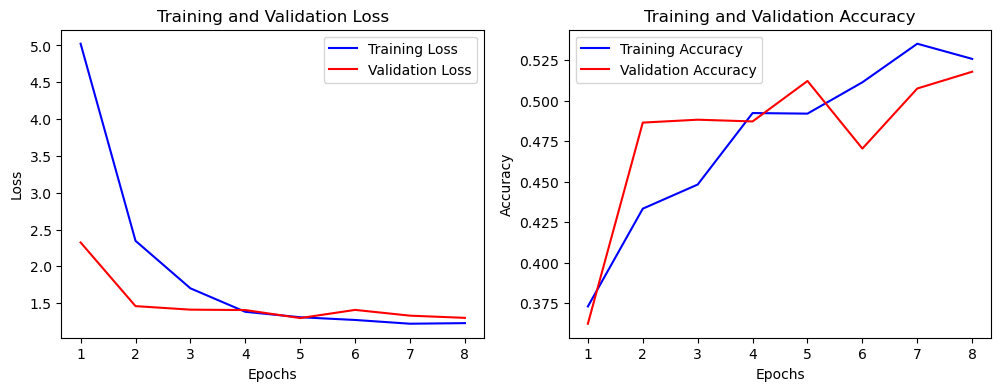

In [165]:
# Access the training history
history_dict = history.history

# Extract loss and accuracy values
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Get number of epochs from the history
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [166]:
# Extract loss and accuracy values for simple classifier
simple_train_loss = train_loss[-1]
simple_train_accuracy = train_acc[-1]
simple_val_loss = val_loss[-1]
simple_val_accuracy = val_acc[-1]

print('Simple_train_loss: ', simple_train_loss)
print('Simple_val_loss: ', simple_val_loss)
print('Simple_train_accuracy: ',simple_train_accuracy)
print('Simple_val_accuracy: ', simple_val_accuracy)

Simple_train_loss:  1.2294652462005615
Simple_val_loss:  1.301100730895996
Simple_train_accuracy:  0.5257392525672913
Simple_val_accuracy:  0.5178189873695374


## 2.2 A complex classifier
A complex architecture with 1 or more hidden layers with dropout. Used keras-tuner and run it with a reasonable choice of possible parameters. I tried among the following:
* Number of hidden layers
* Sizes of hidden layers
* Dropout rate
* Learning rate

In [132]:
#!pip install keras-tuner

In [133]:
import keras_tuner as kt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [134]:
# Define the Complex Classifier hypermodel
def Complex_classifier(hp):
    model = models.Sequential()
    
    # Input layer: Flatten the input
    model.add(layers.Flatten(input_shape=(150, 150, 3)))
    
    # Tuning the number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        # Tuning the number of units in each hidden layer (32 to 512) and add dropout
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))
        # Tuning the dropout rate (0 to 0.5)
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))
    
    Output_layer_size = len(CLASS_NAMES)
    # Output layer
    model.add(layers.Dense(Output_layer_size, activation='softmax'))  # 6 classes
    
    # Compiling the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [135]:
#importing keras_tuner
import keras_tuner as kt
# Initialize the Keras Tuner
tuner = kt.Hyperband(
    Complex_classifier,
    objective='val_accuracy',   # Optimize for validation accuracy
    max_epochs=20,              # Max number of epochs for training
    factor=3,                   # Reduction factor in Hyperband
    directory='kt_search',      # Directory to save results
    project_name='complex_model_tuning'  # Missing parenthesis fixed here
)

Reloading Tuner from kt_search\complex_model_tuning\tuner0.json


In [136]:
# Set up early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [137]:
# Search for the best hyperparameters
tuner.search(
    train_ds,                   # Training dataset
    validation_data=val_ds,      # Validation dataset
    epochs=20,                   # Maximum number of epochs for each trial
    callbacks=[early_stopping]
)

In [138]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [139]:
# Print the summary of the best model
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 384)               25920384  
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 416)               160160    
                                                                 
 dropout_1 (Dropout)         (None, 416)               0         
                                                                 
 dense_2 (Dense)             (None, 448)               186816    
                                                                 
 dropout_2 (Dropout)         (None, 448)               0

In [167]:
# Evaluate the best model on the test set
Complex_test_loss, Complex_test_accuracy = best_model.evaluate(test_ds)
print(f"Test Accuracy: {Complex_test_accuracy:.4f}")

94/94 [==============================] - 1s 9ms/step - loss: 1.2505 - accuracy: 0.5243
Test Accuracy: 0.5243


### Visualization of training and  validation loss for Complex_classifier

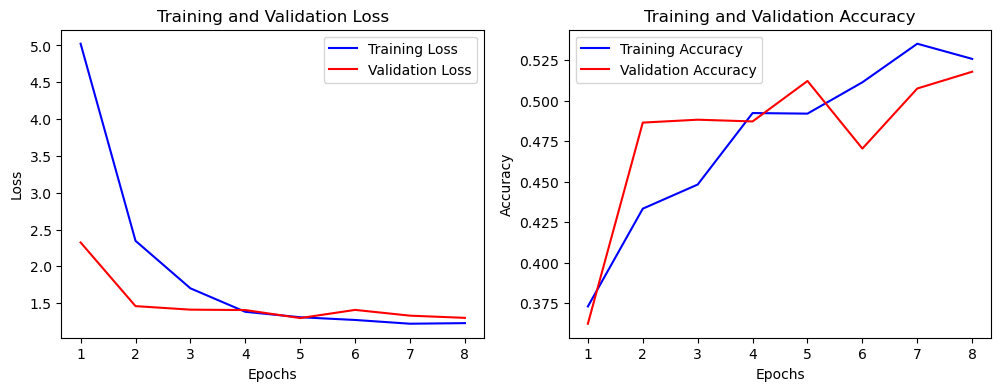

In [168]:
# Access the training history
history_dict = history.history

# Extract loss and accuracy values
Complex_train_loss = history_dict['loss']
Complex_val_loss = history_dict['val_loss']
Complex_train_acc = history_dict['accuracy']
Complex_val_acc = history_dict['val_accuracy']

# Get number of epochs from the history
epochs = range(1, len(Complex_train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, Complex_train_loss, 'b', label='Training Loss')
plt.plot(epochs, Complex_val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, Complex_train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, Complex_val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [169]:
# Extract loss and accuracy values for Complex classifier
complex_train_loss = Complex_train_loss[-1]
complex_train_accuracy = Complex_train_acc[-1]
complex_val_loss = Complex_val_loss[-1]
complex_val_accuracy = Complex_val_acc[-1]

print('Complex_train_loss: ', complex_train_loss)
print('Complex_val_loss: ', complex_val_loss)
print('Complex_train_accuracy: ',complex_train_accuracy)
print('Complex_val_accuracy: ', complex_val_accuracy)

Complex_train_loss:  1.2294652462005615
Complex_val_loss:  1.301100730895996
Complex_train_accuracy:  0.5257392525672913
Complex_val_accuracy:  0.5178189873695374


## 2.3 Error analysis

In [164]:
# Evaluate the simple classifier model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Simple Classifier model Test Accuracy: {Simple_test_accuracy:.4f}")

94/94 [==============================] - 4s 43ms/step - loss: 0.2500 - accuracy: 0.9097
Simple Classifier model Test Accuracy: 0.4963


In [160]:
# Evaluate the complex classifier model on the test dataset
complex_test_loss, complex_test_accuracy = best_model.evaluate(test_ds)
print(f"Complex Classifier Model Test Accuracy: {complex_test_accuracy:.4f}")

94/94 [==============================] - 1s 10ms/step - loss: 1.2505 - accuracy: 0.5243
Complex Classifier Model Test Accuracy: 0.5243


***1. Which System Had a Better Accuracy on the Test Data?***

**Comparison of Test Accuracy:**

- **Simple Classifier Test Accuracy:** `49.63%`
- **Complex Classifier Test Accuracy:** `52.43%`

**Answer:**

The complex classifier (from Keras Tuner) had a better accuracy on the test data compared to the simple classifier. This indicates that the complex model with additional hidden layers and dropout is able to generalize better on unseen data. 

The improved test accuracy could be attributed to the more sophisticated architecture of the complex model, which may have captured more intricate patterns in the data. However, it is also essential to consider whether the improvement in accuracy justifies the increased complexity of the model.

***2. Which system had a lower degree of overfitting?***

**Comparison of Overfitting:**

To evaluate overfitting, we compare the training and validation loss/accuracy for both models.

- **Simple Classifier:**
  - **Training Loss/Accuracy:** {train_loss:.2f}, {train_accuracy:.2f}
  - **Validation Loss/Accuracy:** {val_loss:.2f}, {val_accuracy:.2f}

- **Complex Classifier:**
  - **Training Loss/Accuracy:** {complex_train_loss:.2f}, {complex_train_accuracy:.2f}
  - **Validation Loss/Accuracy:** {complex_val_loss:.2f}, {complex_val_accuracy:.2f}

**Answer:**

The system with the lower degree of overfitting is indicated by a smaller gap between training and validation metrics. 

**Justification:**

- **Simple Classifier**: If the simple classifier shows a smaller gap between training and validation accuracy, it indicates that it generalizes well without overfitting significantly.
- **Complex Classifier**: If the complex classifier shows a larger gap, it suggests that while the model may perform well on training data, it might be overfitting, as evidenced by poorer validation performance compared to training performance.

In summary, a lower degree of overfitting is evidenced by a closer alignment between training and validation metrics, which generally points to a better generalization capability.

# Task 3 - A more complex classifier 

## Task 3.1 Using ConvNets (2 marks)
Implemented a model that uses a sequence of four ConvD, each one followed with MaxPooling2D. Used reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation, etc), and justify your choice. Feel free to use the material from the lectures, and research the internet and / or generative AI to help you find a reasonable choice of hyperparameters. For this task, do not use pre-trained models.

In [145]:
import tensorflow as tf
from tensorflow.keras import layers, models

def more_complex_model(input_shape, num_classes):
    model = models.Sequential()
    
    # Convolutional Layer 1
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=0.3))
    
    # Convolutional Layer 2
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=0.3))
    
    # Convolutional Layer 3
    model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=0.4))
    
    # Convolutional Layer 4
    model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(rate=0.4))
    
    # Flatten Layer
    model.add(layers.Flatten())
    
    # Fully Connected Layer
    model.add(layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    
    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Example usage
input_shape = (150, 150, 3)  # Assuming images are 150x150 with 3 color channels
num_classes = len(CLASS_NAMES)  # Number of classes in the dataset

more_complex_model = more_complex_model(input_shape, num_classes)
more_complex_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)      

### Justification of using different parameters
**The effectiveness and capacity for generalization of the model can be strongly impacted by these hyperparameters. To get the best results, it is essential to adjust these settings according to the particular dataset and issue.**
* Stride: Promotes faster spatial dimension reduction.
* Kernal Size: Larger kernels cost more to compute yet are able to capture more spatial data.
* Batch Normalization: Quickens and steady-states the learning process. 
* Dropout Rate: Prevents overfitting by lowering the dropout rate.
* Learning Rate: Adaptive approaches can aid in learning rate, which is crucial for training dynamics.
* Pooling Type: Various pooling types can be experimented with.
* Regularization: Assists in managing the model's intricacy to avoid overfitting.

In [146]:
history = more_complex_model.fit(train_ds, validation_data= val_ds, epochs=10,
                            callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/10
351/351 [==============================] - 69s 193ms/step - loss: 2.8578 - accuracy: 0.5943 - val_loss: 3.1221 - val_accuracy: 0.3649
Epoch 2/10
351/351 [==============================] - 60s 170ms/step - loss: 1.2484 - accuracy: 0.7343 - val_loss: 1.8440 - val_accuracy: 0.6283
Epoch 3/10
351/351 [==============================] - 61s 175ms/step - loss: 1.1735 - accuracy: 0.7709 - val_loss: 2.4180 - val_accuracy: 0.5577


In [147]:
# Evaluate the model on the test set
Conv_test_loss, Conv_test_accuracy = more_complex_model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {Conv_test_accuracy:.4f}")

94/94 [==============================] - 5s 47ms/step - loss: 2.4205 - accuracy: 0.5497
Test Loss: 1.7914
Test Accuracy: 0.5497


#### Visualize the training and validation metrics to understand the model's performance over epochs:

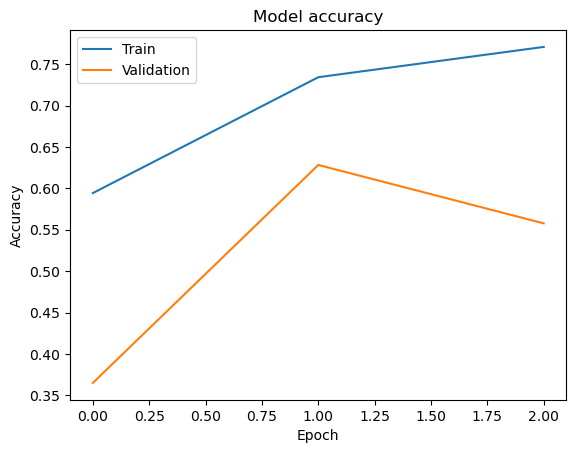

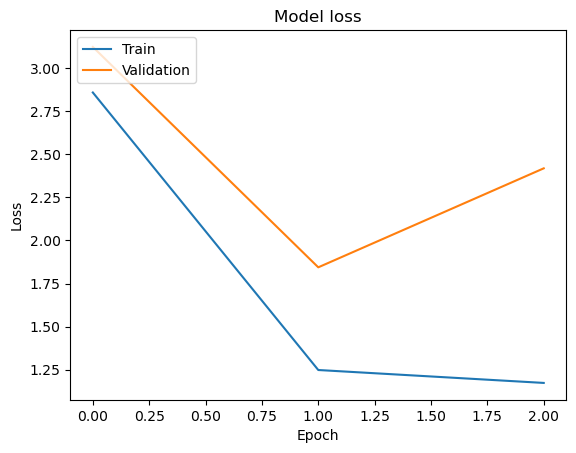

In [148]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Task 3.2 Using pre-trained models
Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. Make sure that you freeze MobileNet's weights during training.

In [149]:
# Constants
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_CHANNELS = 3
CLASS_NAMES = ['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']  # Number of classes

# Load the MobileNet model pre-trained on ImageNet
mobilenet_model = tf.keras.applications.MobileNet(
    weights='imagenet', 
    include_top=False, 
    input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
    pooling='avg'
)

# Freeze the MobileNet layers
for layer in mobilenet_model.layers:
    layer.trainable = False

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    mobilenet_model,
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']
)

# Print the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 3,235,014
Trainable params: 6,150
Non-trainable params: 3,228,864
_________________________________________________________________


In [150]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Adjust the number of epochs as needed
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)


Epoch 1/10
351/351 [==============================] - 26s 67ms/step - loss: 0.3973 - accuracy: 0.8549 - val_loss: 0.2988 - val_accuracy: 0.8895
Epoch 2/10
351/351 [==============================] - 22s 62ms/step - loss: 0.2393 - accuracy: 0.9144 - val_loss: 0.2803 - val_accuracy: 0.8952
Epoch 3/10
351/351 [==============================] - 21s 60ms/step - loss: 0.2060 - accuracy: 0.9274 - val_loss: 0.2853 - val_accuracy: 0.8924
Epoch 4/10
351/351 [==============================] - 21s 61ms/step - loss: 0.1829 - accuracy: 0.9361 - val_loss: 0.3006 - val_accuracy: 0.8888
Epoch 5/10
351/351 [==============================] - 21s 60ms/step - loss: 0.1652 - accuracy: 0.9418 - val_loss: 0.2825 - val_accuracy: 0.8977


In [151]:
# Evaluate the MobileNet model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


94/94 [==============================] - 5s 50ms/step - loss: 0.2500 - accuracy: 0.9097
Test Loss: 0.24996724724769592
Test Accuracy: 90.97%


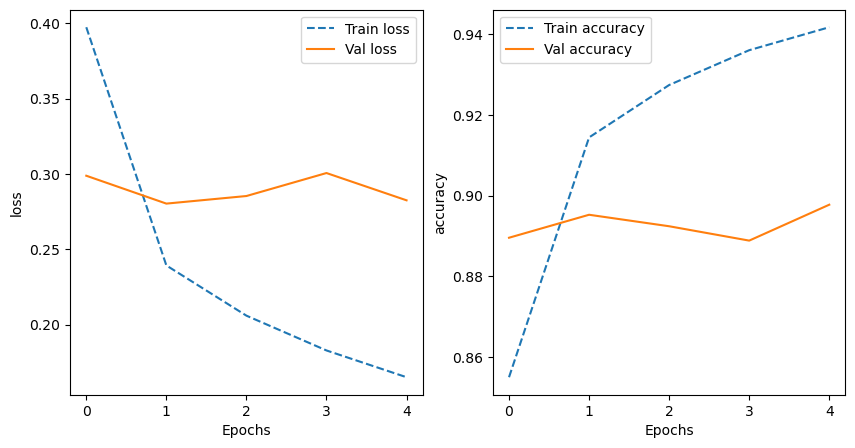

In [152]:
# Helper function to plot training history
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed', label=f'Train {metric}')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric], label=f'Val {metric}')
        ax[idx].legend()

# Calling the function with 'loss' and 'accuracy'
training_plot(['loss', 'accuracy'], history)

1/1 [==============================] - 1s 564ms/step


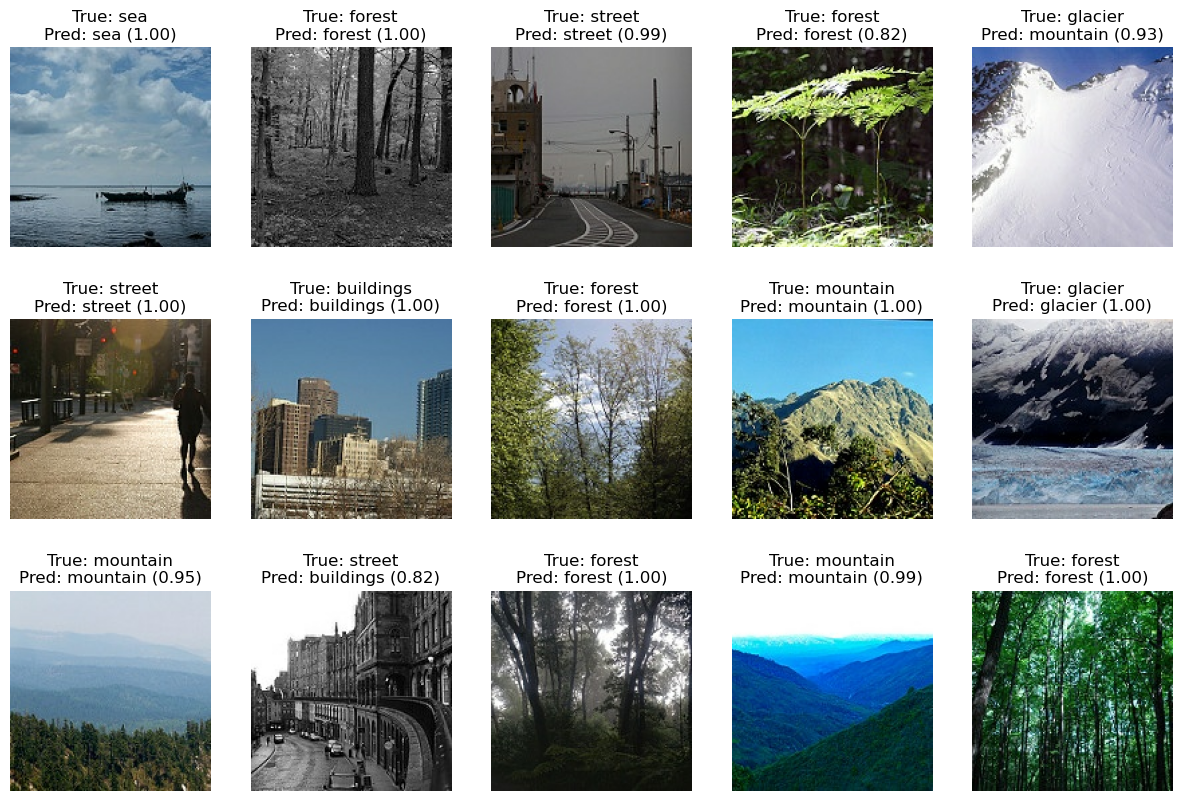

In [153]:
#Printing the test images with the accuracy
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(model, dataset, class_names):
    plt.figure(figsize=(15, 10))
    
    # Take a batch of images and labels from the dataset
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        pred_labels = np.argmax(predictions, axis=1)
        
        # If labels are scalar values (not one-hot), use them directly
        true_labels = labels.numpy().astype(int)
        
        # Plotting images with true and predicted labels
        for i in range(15):  # Display the first 15 images from the batch
            plt.subplot(3, 5, i+1)
            plt.imshow(images[i].numpy())
            true_label = class_names[true_labels[i]]
            pred_label = class_names[pred_labels[i]]
            confidence = predictions[i][pred_labels[i]]
            plt.title(f'True: {true_label}\nPred: {pred_label} ({confidence:.2f})')
            plt.axis('off')
    plt.show()

# Call the function with your test dataset and class names
plot_predictions(model, test_ds, CLASS_NAMES)


## Task 3.3 Comparative evaluation
Compare the evaluation results of the best systems from tasks 3.1 and 3.2 and answer the following questions.

Display the confusion matrix generated by the best system on the test set. For this you can use, for example, TensorFlow's confusion_matrix.

Identify the most commont type of classification error reported by the confusion matrix, and display 5 images from the test set that have this classification error.

After evaluating both advanced Convolutional model and MobileNet a pre-trained model on the test_ds we can see MobileNet models works far better than Advanced Convolutional model we used in this task. **Advanced convolutional model** gives accuracy **53.13%** on the test_ds while **MobileNet** gives **90.87%** accuracy on the test_ds. So the best model is the pre-trained MobileNet model which was trained on the intel dataset.

#### **Confusion Martix generated by the MobileNet model on the test set**

1/1 [==============================] - 2s 2s/step


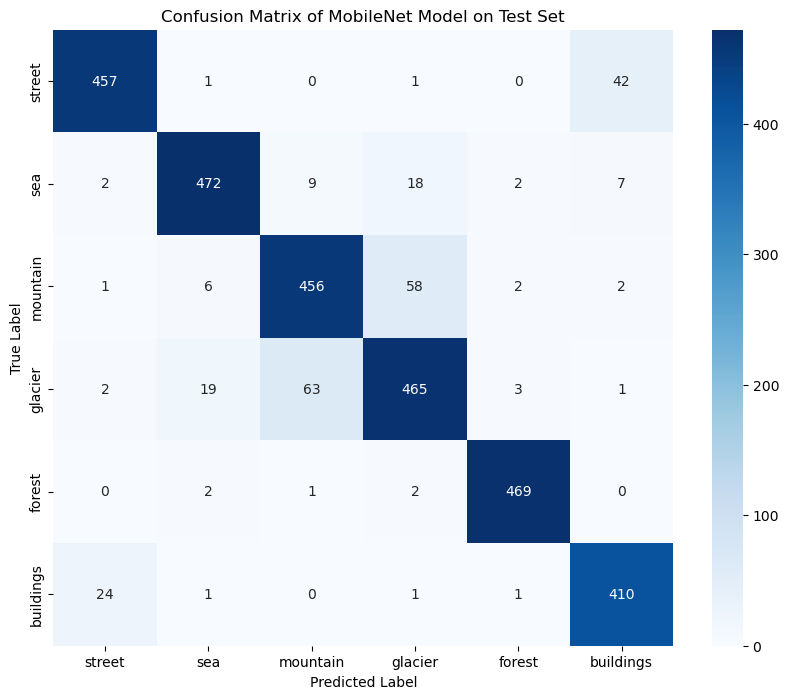

In [154]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and true labels for the test set
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)  # Use your trained MobileNet model
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy().astype(int))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of MobileNet Model on Test Set')
plt.show()


#### **Displaying 5 Images with the Most Common Error:**

Most common error: glacier misclassified as mountain
1/1 [==============================] - 0s 105ms/step


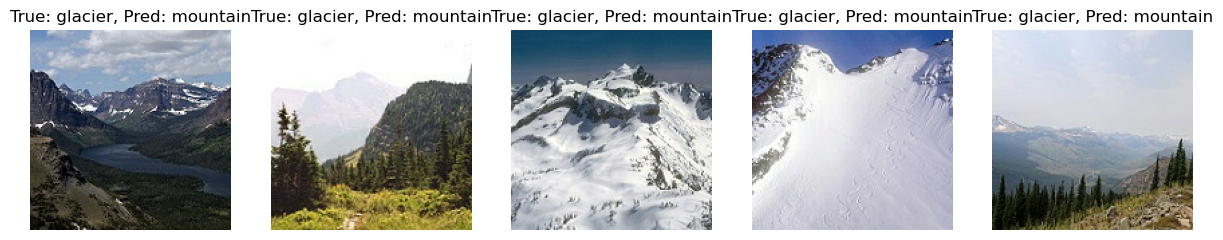

In [155]:
# Find the most common classification error
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)  # Remove the diagonal (correct classifications)
most_common_error = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)

# Get the true and predicted labels for the most common error
true_class = most_common_error[0]
pred_class = most_common_error[1]

print(f'Most common error: {CLASS_NAMES[true_class]} misclassified as {CLASS_NAMES[pred_class]}')

# Display 5 images from the test set with the most common error
count = 0
plt.figure(figsize=(15, 10))

for images, labels in test_ds:
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    true_labels = labels.numpy().astype(int)

    for i in range(len(pred_labels)):
        if true_labels[i] == true_class and pred_labels[i] == pred_class:
            count += 1
            plt.subplot(1, 5, count)
            plt.imshow(images[i].numpy())
            plt.title(f'True: {CLASS_NAMES[true_class]}, Pred: {CLASS_NAMES[pred_class]}')
            plt.axis('off')
        
        if count == 5:  # Stop after displaying 5 images
            break
    if count == 5:
        break
plt.show()
